In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
temp_country = pd.read_csv('../data/cleaned/annual_increase_of_temp_by_country.csv')
temp_global = pd.read_csv('../data/cleaned/annual_increase_of_temp_global.csv')

H0: The increase of Temperature in India represent the increase of global Temperature

In [3]:
india = temp_country[temp_country['country']=='India']
display(india.head())
display(temp_global.head())

,country,year,average_temperature
448,India,1900,-0.283583
449,India,1901,0.234417
450,India,1902,-0.551250
451,India,1903,-0.008917
452,India,1904,-0.243500


,year,annual_increase_temp
0,1901,0.040333
1,1902,-0.237500
2,1903,-0.084250
3,1904,-0.129250
4,1905,0.134250


Text(0.5, 1.0, 'Global')

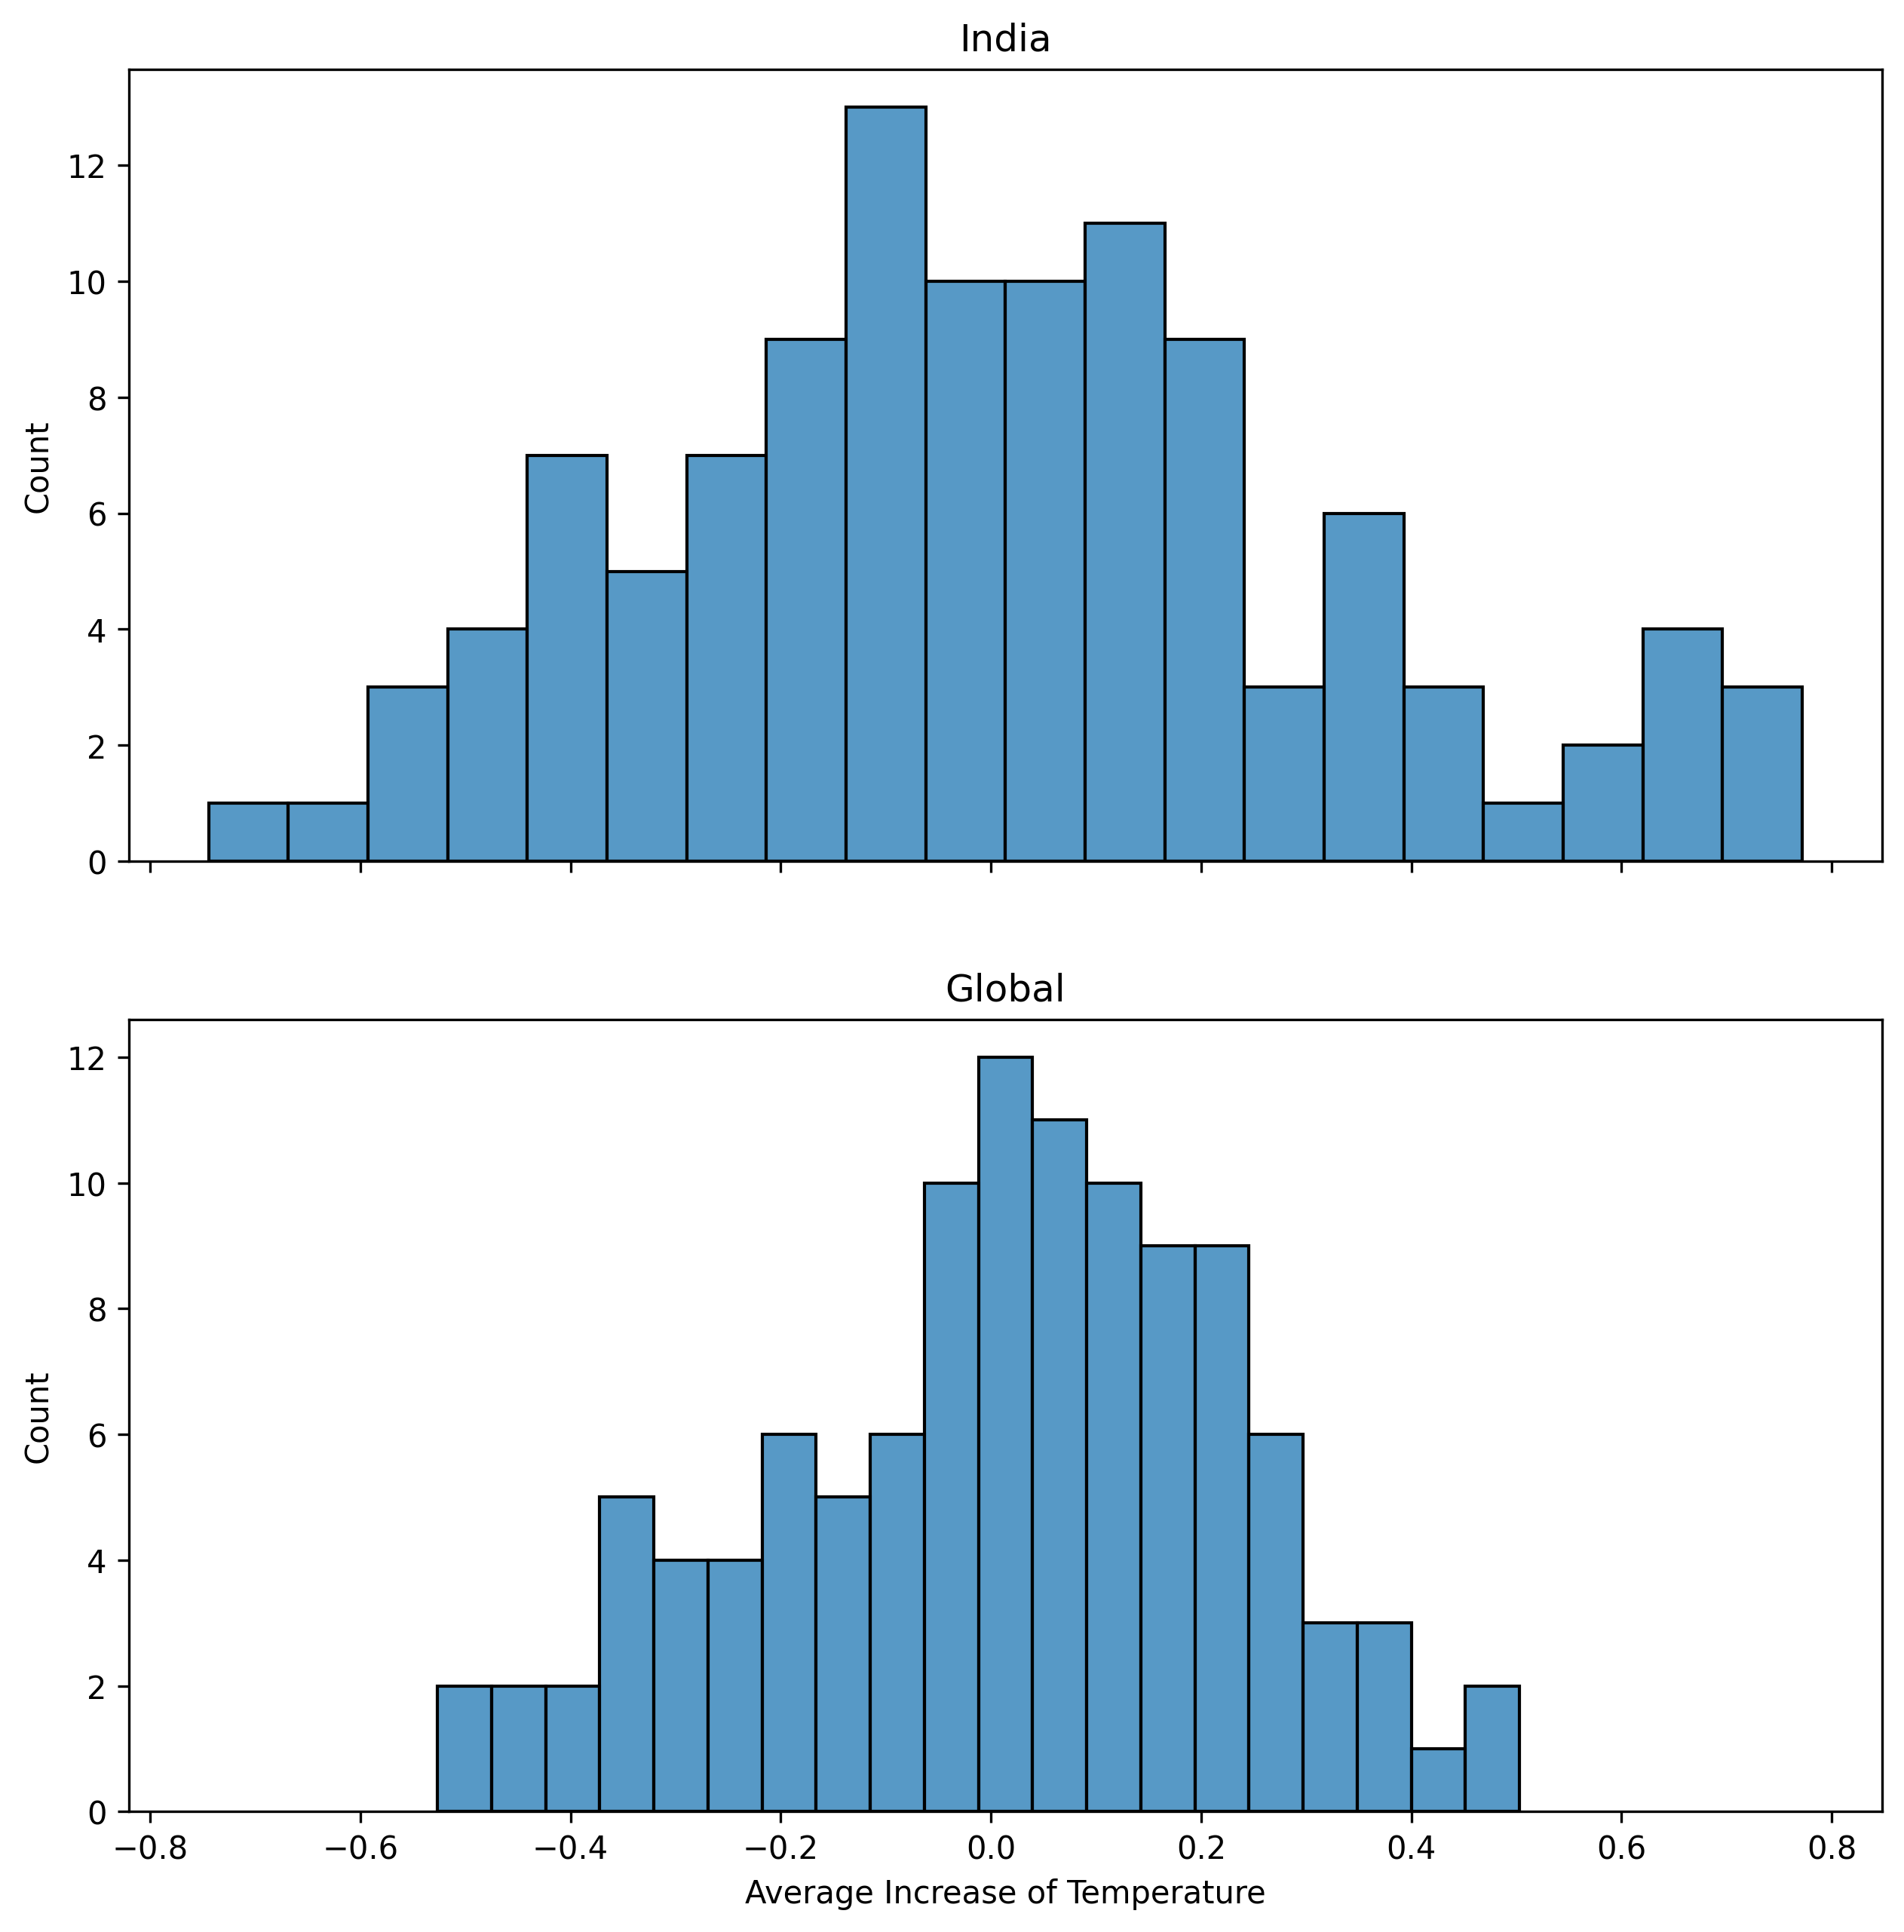

In [4]:
fig, ax = plt.subplots(2,1, figsize=(10,10), dpi=300, sharex=True)
sns.histplot(data=india, x='average_temperature', ax=ax[0], bins=20)
ax[0].set_ylabel("Count") 
ax[0].set_xlabel("Average Increase of Temperature") 
ax[0].set_title("India") 
sns.histplot(data=temp_global, x='annual_increase_temp', ax=ax[1], bins=20)
ax[1].set_ylabel("Count") 
ax[1].set_xlabel("Average Increase of Temperature") 
ax[1].set_title("Global") 


In [5]:
X_bar_india = india['average_temperature'].mean()
n_india = india['average_temperature'].count()
s_india = india['average_temperature'].std()
print(X_bar_india)
print(n_india)
print(s_india)

0.002437499999999999
112
0.32435835935394475


In [6]:
X_bar_global = temp_global['annual_increase_temp'].mean()
n_global = temp_global['annual_increase_temp'].count()
s_global = temp_global['annual_increase_temp'].std()
print(X_bar_global)
print(n_global)
print(s_global)

0.008979910714285706
112
0.22250326201496293


In [7]:
samples_estimates = X_bar_india-X_bar_global
samples_estimates

-0.006542410714285707

In [8]:
#pooled variance
sp = np.sqrt((((n_india-1)*np.power(s_india,2))+((n_global-1)*np.power(s_global,2)))/(n_india+n_global-2))
sp

0.27813310382807904

In [9]:
#statistics
t = samples_estimates/(sp*np.sqrt(1/10+1/13))
t

-0.055923311499283104

In [10]:
#significance level
alpha = 0.05

In [11]:
#degrees of freedom
df = n_india + n_global -2
df

222

In [12]:
import scipy.stats
from scipy.stats import ttest_1samp

lower_critical_value, upper_critical_value = scipy.stats.t.ppf((alpha/2), df=df), scipy.stats.t.ppf(1-(alpha/2), df=df)
print("The lower critical value is {:.3f}".format(lower_critical_value))
print("The upper critical value is {:.3f}".format(upper_critical_value))

The lower critical value is -1.971
The upper critical value is 1.971


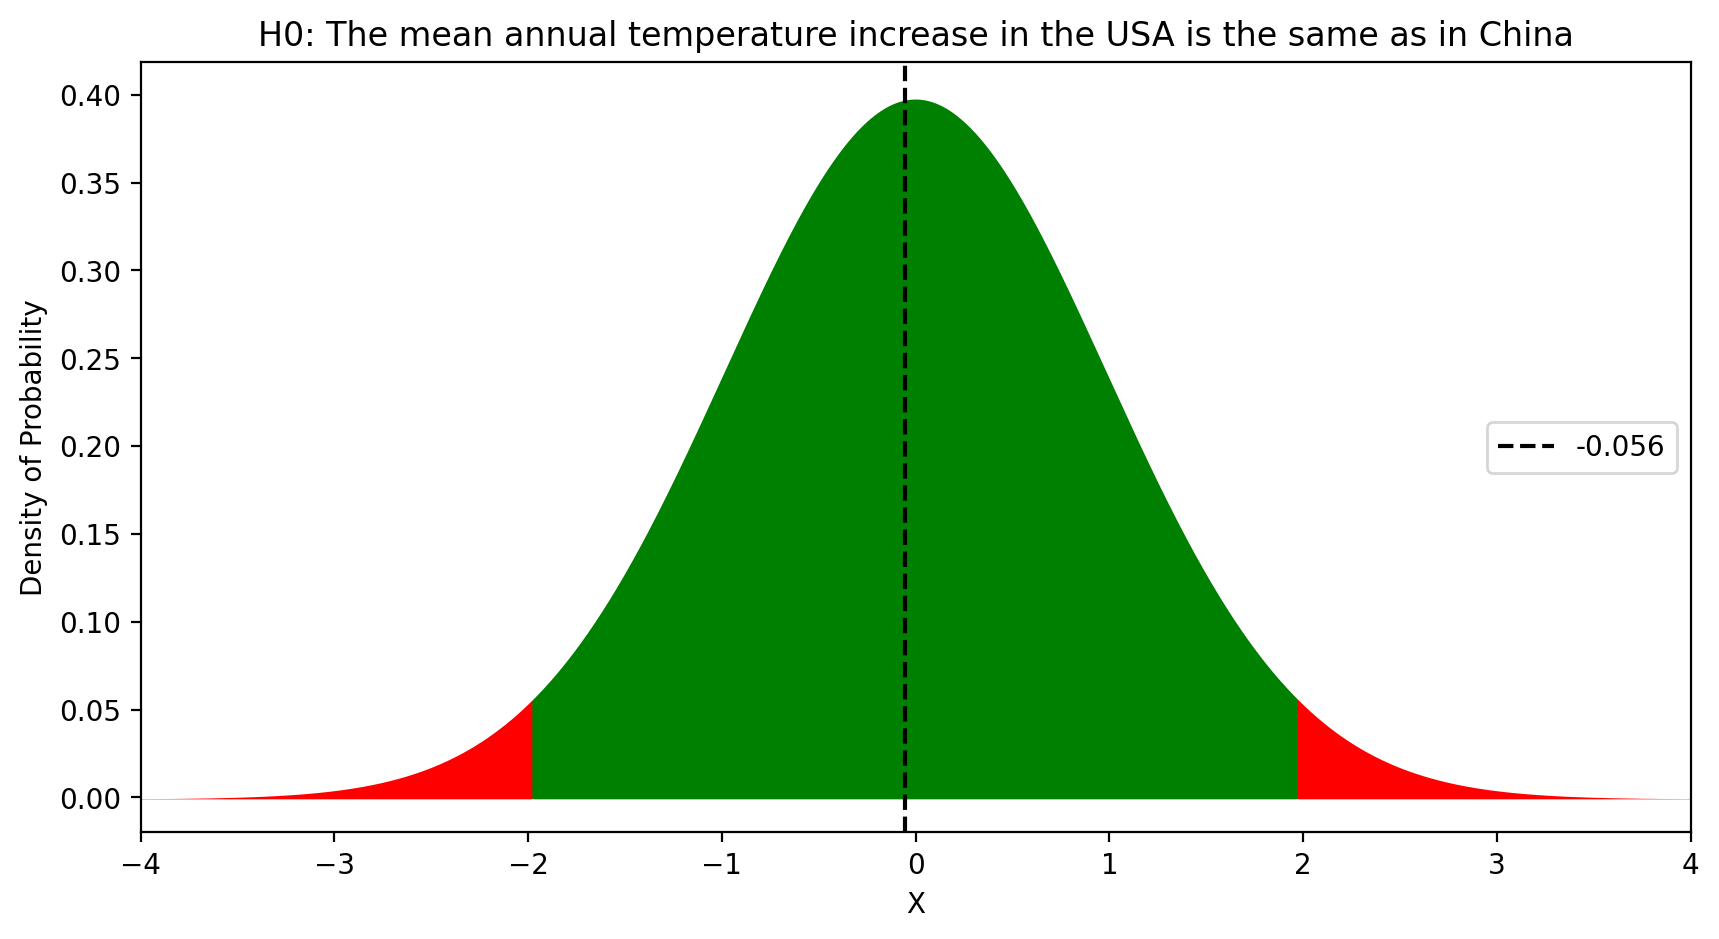

In [13]:
x = np.linspace(-4,4,1000)
y_pdf = scipy.stats.t.pdf(x,df=df)
fig, ax = plt.subplots(figsize=(10,5), dpi=200)
ax.plot(x,y_pdf, color='white')
idx_low = (np.abs(x - lower_critical_value)).argmin()
idx_up  = (np.abs(x - upper_critical_value)).argmin()
ax.fill_between(x[:idx_low], y_pdf[:idx_low], color='red')
ax.fill_between(x[idx_low:idx_up], y_pdf[idx_low:idx_up], color='green')
ax.fill_between(x[idx_up:], y_pdf[idx_up:], color='red')
plt.axvline(x=t, color='black', linestyle='--')
ax.set_xlim(-4,4)
ax.set_xlabel("X")
ax.set_ylabel("Density of Probability")
ax.set_title("H0: The mean annual temperature increase in the USA is the same as in China")
plt.plot([], [], color='black', linestyle='--', label=t.round(3))
plt.legend(loc='center right')
plt.show()